# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'
NDIM = 1  # Dimensionality of parameter z
NROUNDS = 1  # Optimization rounds
N_TRAIN = 10000
N_BATCH = 5

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.1):
    z = (z-0.5)*25
    x = np.cos(z)
    n = np.random.randn(*x.shape)*sigma    
    return x + n

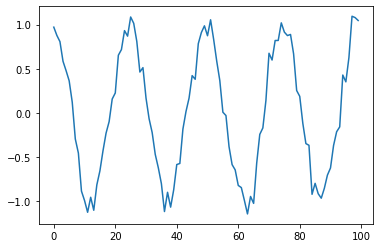

In [4]:
z = np.linspace(0, 1, 100)
z = z.repeat(2).reshape(100,2)
x = [model(z0)[0] for z0 in z]
plt.plot(x)

In [5]:
z0 = np.ones(NDIM)*0.5
x0 = model(z0, sigma = 1e-6)
x0

array([0.99999935])

In [6]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [7]:
for i in range(NROUNDS):
    sw.round(n_sims = 10000, n_train = [N_TRAIN, N_TRAIN, N_TRAIN], lr = [1e-3, 1e-4, 1e-5], n_particles = 1, n_batch = N_BATCH)

 75%|███████▌  | 7548/10000 [00:00<00:00, 37993.29it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)


  0%|          | 0/10000 [00:00<?, ?it/s]

Network optimization


100%|██████████| 10000/10000 [09:37<00:00, 17.32it/s]


In [8]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

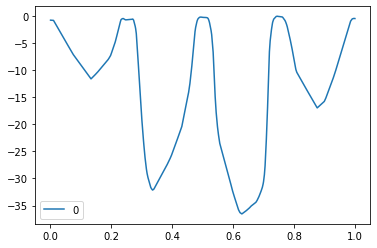

In [9]:
for i in range(NROUNDS):
    #plt.plot(post[i][0]['z'], np.exp(post[i][0]['lnL']), label=i)
    plt.plot(post[i][0]['z'], post[i][0]['lnL'], label=i)
plt.legend()